In [2]:
import pandas as pd
import re
import seaborn as sns
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('tagsets')
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kirilltiufanov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kirilltiufanov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kirilltiufanov/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     /Users/kirilltiufanov/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/kirilltiufanov/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
from bs4 import BeautifulSoup


In [4]:
tw_clean = pd.read_csv("tw_data_short.csv")
tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567526 entries, 0 to 567525
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            567526 non-null  object 
 1   time            567526 non-null  object 
 2   date_final      567526 non-null  object 
 3   tweet           567526 non-null  object 
 4   mentions        567526 non-null  object 
 5   replies_count   567526 non-null  float64
 6   retweets_count  567526 non-null  float64
 7   likes_count     567526 non-null  float64
 8   hashtags        567526 non-null  object 
dtypes: float64(3), object(6)
memory usage: 39.0+ MB


In [5]:
tw_clean.tweet[12344]

'#dogecoin is finding a nice support line at 26c, looking to bust thru 27c again and flirt with 30c!! I feel like #DOGE can make all that happen today! 😏😏😎#dogearmy #Doge4Amazon #DogecoinToTheMoon #DogecoinRise #DogeDay'

In [23]:
!pip install wordcloud

     |████████████████████████████████| 160 kB 3.2 MB/s eta 0:00:01


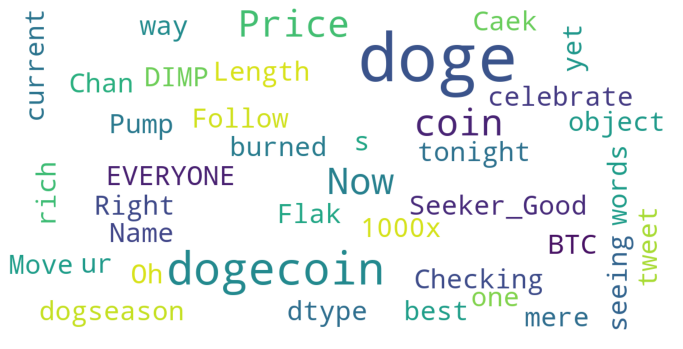

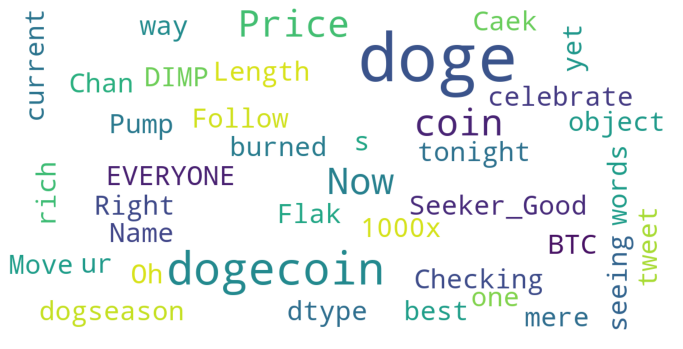

In [24]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(tw_clean.tweet)
show_wordcloud(tw_clean.tweet)

In [6]:
tweets = ['']
corpus=[]
for tweet in tw_clean["tweet"]:
    tweets.append(tweet)
    corpus.append(nltk.sent_tokenize(tweet))

In [7]:
corpus=[sent for sublist in corpus for sent in sublist]
len(corpus)

1124861

In [21]:
pd.DataFrame(corpus).to_csv("words.txt")

In [8]:
for i in range(len(corpus)):
    corpus[i] = corpus[i].lower()
    corpus[i] = re.sub(r'\W+',' ',corpus[i]) # Replace everything non-alpahnumeric by ' '
    corpus[i] = re.sub(r'\s+',' ',corpus[i]) # Replace one or more whitespaces by  ' '
    corpus[i] = re.sub(r'\d+',' ',corpus[i]) # Replace one or more digits by  ' '
    corpus[i] = re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)'," ", corpus[i]) # Replace e-mails by ' '
    # Replace urls by ''
    corpus[i] = re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', ' ' , corpus[i]) 
    # Replace html tags by ''
    corpus[i] = BeautifulSoup(corpus[i], 'html.parser').get_text().strip()

In [9]:
corpus[31122]

'are you all seeing what i m seeing on the one month dogecoin chart'

In [10]:
wordfreq = {}
for sentence in corpus:
    words = sentence.split()
    #tokens = nltk.word_tokenize(sentence) # To get the words, it can be also done with sentence.split()
    for word in words:
        if ( word not in wordfreq.keys() ): ## first time appearnce in the sentence
            wordfreq[word] = 1 # We initialize the corresponding counter
        else: ## if the world is already existed in the dictionalry 
            wordfreq[word] += 1 # We increase the corresponding counter

In [11]:
wordfreq

{'checking': 437,
 'doge': 677098,
 'coin': 36959,
 'seeing': 1850,
 'if': 44011,
 'ur': 1237,
 'rich': 4527,
 'yet': 3422,
 'your': 34898,
 'so': 29089,
 'move': 6078,
 'right': 12716,
 'now': 47614,
 'follow': 11795,
 'the': 302926,
 'best': 6122,
 'channel': 1575,
 'in': 101287,
 'telegram': 1627,
 'https': 254722,
 't': 309808,
 'co': 254690,
 'wpp': 4,
 'gwrpf': 2,
 'btc': 58284,
 'eth': 41746,
 'xrp': 30620,
 'ins': 43,
 'trx': 11559,
 'xvg': 4420,
 'dnt': 2026,
 'key': 1059,
 'drep': 968,
 'eng': 43,
 'erd': 109,
 'bat': 2440,
 'xlm': 12182,
 'evx': 292,
 'enj': 4436,
 'ada': 20794,
 'tomo': 857,
 'zil': 3626,
 'chz': 3860,
 'poe': 8,
 'agi': 196,
 'xmr': 2781,
 'data': 732,
 'qlc': 143,
 'gnt': 32,
 'storj': 471,
 'mth': 188,
 'ellrih': 1,
 'yv': 159,
 'seeker_good': 1,
 'x': 13415,
 'for': 85341,
 'all': 45233,
 'dogseason': 3,
 'coins': 8768,
 'shib': 10540,
 'akita': 2893,
 'hoge': 11030,
 'hokk': 1123,
 'pit': 178,
 'oh': 2649,
 'and': 160273,
 'by': 17140,
 'way': 8989,
 '

In [12]:
#stop words
from nltk.corpus import stopwords

stop_words = list(stopwords.words('english')) 
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
for i in range(len(stop_words)):
    stop_words[i] = re.sub(r"\s*'\s*\w*","",stop_words[i])
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'you',
 'you',
 'you',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more'

In [14]:
filter_list = ['https','co', 'h', 'x', 'u' ]
corpus = [(wordfreq[key],key) for key in list(wordfreq.keys()) if key not in stop_words and key not in filter_list]

In [15]:
#sorting by freq
corpus.sort(reverse = True)
corpus_freq = [(word[1],word[0]) for word in corpus[:201]] 
corpus_freq = corpus_freq[1:]
corpus_freq

[('dogecoin', 237265),
 ('dogearmy', 93397),
 ('elonmusk', 77342),
 ('buy', 60504),
 ('dogecointothemoon', 59919),
 ('btc', 58284),
 ('crypto', 53421),
 ('dogecoinrise', 51773),
 ('dogecoinarmy', 43356),
 ('eth', 41746),
 ('get', 40507),
 ('bitcoin', 38737),
 ('moon', 38552),
 ('dollar', 37059),
 ('coin', 36959),
 ('one', 36383),
 ('like', 31817),
 ('xrp', 30620),
 ('let', 30207),
 ('go', 29319),
 ('hold', 28389),
 ('k', 28186),
 ('people', 27752),
 ('dogecoins', 25684),
 ('going', 25012),
 ('cryptocurrency', 23283),
 ('dogecointo', 22993),
 ('dogetothemoon', 22965),
 ('price', 22489),
 ('dogeday', 21776),
 ('ada', 20794),
 ('today', 20630),
 ('dogecointoadollar', 20425),
 ('time', 20401),
 ('bnb', 19950),
 ('link', 19827),
 ('amp', 18493),
 ('hodl', 18079),
 ('make', 17910),
 ('last', 17546),
 ('day', 17199),
 ('pump', 16834),
 ('sell', 16546),
 ('money', 16244),
 ('see', 15939),
 ('elon', 15681),
 ('new', 15632),
 ('retweet', 15556),
 ('ltc', 15434),
 ('amc', 15403),
 ('good', 15327)

In [16]:
lem = WordNetLemmatizer()

corpus_freq = [(lem.lemmatize(word[0]),word[1]) for word in corpus_freq]
corpus_freq

[('dogecoin', 237265),
 ('dogearmy', 93397),
 ('elonmusk', 77342),
 ('buy', 60504),
 ('dogecointothemoon', 59919),
 ('btc', 58284),
 ('crypto', 53421),
 ('dogecoinrise', 51773),
 ('dogecoinarmy', 43356),
 ('eth', 41746),
 ('get', 40507),
 ('bitcoin', 38737),
 ('moon', 38552),
 ('dollar', 37059),
 ('coin', 36959),
 ('one', 36383),
 ('like', 31817),
 ('xrp', 30620),
 ('let', 30207),
 ('go', 29319),
 ('hold', 28389),
 ('k', 28186),
 ('people', 27752),
 ('dogecoins', 25684),
 ('going', 25012),
 ('cryptocurrency', 23283),
 ('dogecointo', 22993),
 ('dogetothemoon', 22965),
 ('price', 22489),
 ('dogeday', 21776),
 ('ada', 20794),
 ('today', 20630),
 ('dogecointoadollar', 20425),
 ('time', 20401),
 ('bnb', 19950),
 ('link', 19827),
 ('amp', 18493),
 ('hodl', 18079),
 ('make', 17910),
 ('last', 17546),
 ('day', 17199),
 ('pump', 16834),
 ('sell', 16546),
 ('money', 16244),
 ('see', 15939),
 ('elon', 15681),
 ('new', 15632),
 ('retweet', 15556),
 ('ltc', 15434),
 ('amc', 15403),
 ('good', 15327)

In [18]:
pd.DataFrame(corpus_freq).to_csv("words.csv")

In [17]:
cols = {word[0]: [] for word in corpus_freq}
tweets = pd.DataFrame(cols)


In [18]:
def tweet_inpector(sentence, stop_words, words):
    '''
    Function that takes a review and returns a dictionary of word frequencies
    Inputs:
    sentence -> review: string
    stop_words -> list of stop_words
    words -> a list of words to count frequency 
    '''

    import re

    # Decompose the tweet in words -> tokens
    tokens = nltk.word_tokenize(sentence)
    # Cleanup the tokens
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        tokens[i] = re.sub(r'\W',' ',tokens[i]) # Replace everything non-alpahnumeric by ' '
        tokens[i] = re.sub(r'\s+','',tokens[i]) # Replace one or more whitespaces by  ' '
        tokens[i] = re.sub(r'\d+','',tokens[i]) # Replace one or more digits by  ' '
        tokens[i] = lem.lemmatize(tokens[i])
        
    # Droping tokens which are "stopwords" or empty
    tokens = [ token for token in tokens if (token not in stop_words and token != '')]

    # Initializing an empty dictionary of word frequencies for the corresponding review
    col_freq = {col:0 for col in words}
    
    # Filling the dictionary with word frequencies in the tweet
    for token in tokens:
        if token in words:
            col_freq[token] += 1

    return col_freq

In [19]:
my_list = list( map(tweet_inpector, tw_clean['tweet'], 
                    [stop_words]*tw_clean.shape[0], [list(cols.keys())]*tw_clean.shape[0] ) )

my_list[:2]

[{'dogecoin': 0,
  'dogearmy': 0,
  'elonmusk': 0,
  'buy': 0,
  'dogecointothemoon': 0,
  'btc': 0,
  'crypto': 0,
  'dogecoinrise': 0,
  'dogecoinarmy': 0,
  'eth': 0,
  'get': 0,
  'bitcoin': 0,
  'moon': 0,
  'dollar': 0,
  'coin': 1,
  'one': 0,
  'like': 0,
  'xrp': 0,
  'let': 0,
  'go': 0,
  'hold': 0,
  'k': 0,
  'people': 0,
  'dogecoins': 0,
  'going': 0,
  'cryptocurrency': 0,
  'dogecointo': 0,
  'dogetothemoon': 0,
  'price': 0,
  'dogeday': 0,
  'ada': 0,
  'today': 0,
  'dogecointoadollar': 0,
  'time': 0,
  'bnb': 0,
  'link': 0,
  'amp': 0,
  'hodl': 0,
  'make': 0,
  'last': 0,
  'day': 0,
  'pump': 0,
  'sell': 0,
  'money': 0,
  'see': 0,
  'elon': 0,
  'new': 0,
  'retweet': 0,
  'ltc': 0,
  'amc': 0,
  'good': 0,
  'u': 0,
  'gme': 0,
  'keep': 0,
  'dogetoadollar': 0,
  'binance': 0,
  'next': 0,
  'back': 0,
  'still': 0,
  'dot': 0,
  'right': 0,
  'buying': 0,
  'worth': 0,
  'love': 0,
  'much': 0,
  'know': 0,
  'xlm': 0,
  'everyone': 0,
  'need': 0,
  'fo

In [5]:
tweets = pd.DataFrame(my_list)

NameError: name 'my_list' is not defined

In [4]:
tweets.head()


NameError: name 'tweets' is not defined

In [22]:
tweets.to_csv("tweets_token.csv")